In [1]:
import matplotlib.pyplot as plt
import torch as ch
import numpy as np

from fromscratchtoml.models import svm
from fromscratchtoml.toolbox.random import Distribution
from fromscratchtoml.toolbox import binary_visualize

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


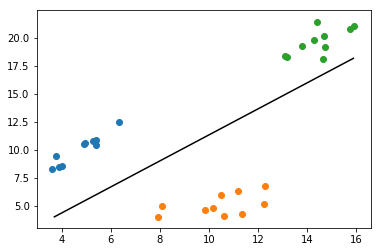

In [2]:
X1 = Distribution.linear(pts=10,
               mean=[5, 10],
               covr=[[1.5, 1], [1, 1.5]])
X2 = Distribution.linear(pts=10,
               mean=[10, 5],
               covr=[[1.5, 1], [1, 1.5]])
X3 = Distribution.linear(pts=10,
               mean=[15, 20],
               covr=[[1.5, 1], [1, 1.5]])

Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X2.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))


clf_lin = svm.SVC(kernel='linear')
clf_lin.fit(X, y)
X = ch.stack([X1, X2, X3])

binary_visualize(X, clf_lin)

## Creating non linear data from a bunch of linear data points.

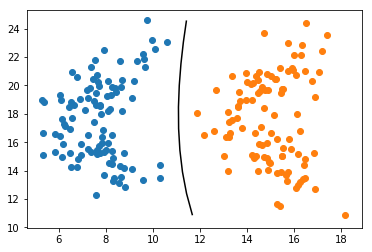

In [3]:
X1 = Distribution.linear(pts=50,
               mean=[8, 20],
               covr=[[1.5, 1], [1, 2]])
X2 = Distribution.linear(pts=50,
               mean=[8, 15],
               covr=[[1.5, -1], [-1, 2]])

X3 = Distribution.linear(pts=50,
               mean=[15, 20],
               covr=[[1.5, 1], [1, 2]])
X4 = Distribution.linear(pts=50,
               mean=[15, 15],
               covr=[[1.5, -1], [-1, 2]])

X1 = ch.cat((X1, X2))
X2 = ch.cat((X3, X4))

Y1 = ch.ones(X1.size()[0])
Y2 = -ch.ones(X2.size()[0])

X = ch.cat((X1, X2))
y = ch.cat((Y1, Y2))


clf_lin = svm.SVC(kernel='polynomial', const=10, degree=2)
clf_lin.fit(X, y)
X = ch.stack([X1, X2])

binary_visualize(X, clf_lin)